<a href="https://colab.research.google.com/github/jaylin0418/Foundations_of_Artificial_Intelligence-2024-Spring-CSIE3005-/blob/main/intro_AI_kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score
from scipy.optimize import linear_sum_assignment

# 1. 下載手寫數字數據集
digits = load_digits()
data = digits.data  # (1797, 64)，每個數字是一個 8x8 的圖像展平為 64 維
labels = digits.target  # 真實標籤 (0-9)


In [ ]:
# 2. 使用 K-means 分群
kmeans = KMeans(n_clusters=10, random_state=42, n_init=10)  # 修正：添加 n_init=10
kmeans.fit(data)
cluster_labels = kmeans.labels_

C 代表分群結果，T 代表真實標籤，C 只代表 K-means 分群的結果。例如 C = 5 不代表真實標籤是 5


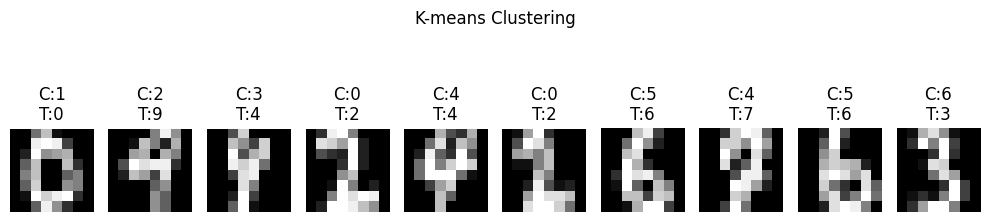

In [ ]:
# 3. 視覺化分群結果
def plot_digits(data, cluster_labels, true_labels, title):
    fig, axes = plt.subplots(1, 10, figsize=(10, 3))
    for i, ax in enumerate(axes):
        ax.set_axis_off()
        ax.imshow(data[i].reshape(8, 8), cmap='gray')
        ax.set_title(f"C:{cluster_labels[i]}\nT:{true_labels[i]}")
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

print("C 代表分群結果，T 代表真實標籤，C 只代表 K-means 分群的結果。例如 C = 5 不代表真實標籤是 5")
# 隨機選擇 10 個數字，顯示其分群結果
rng = np.random.default_rng()  # 使用新的隨機生成器
indices = rng.choice(len(data), size=20, replace=False)
plot_digits(data[indices], cluster_labels[indices], labels[indices], "K-means Clustering")

In [ ]:
# 4. 顯示與真實標籤的比較
print("Cluster labels: ", cluster_labels[indices])
print("True labels:   ", labels[indices])

Cluster labels:  [1 2 3 0 4 0 5 4 5 6 5 1 8 3 0 3 5 6 7 3]
True labels:    [0 9 4 2 4 2 6 7 6 3 6 0 9 1 2 1 6 2 5 8]


In [ ]:
# 5. 計算分群準確率
def calculate_accuracy(true_labels, cluster_labels):
    num_classes = len(np.unique(true_labels))
    confusion_matrix = np.zeros((num_classes, num_classes), dtype=int)
    for true, cluster in zip(true_labels, cluster_labels):
        confusion_matrix[true, cluster] += 1

    # 使用匈牙利算法尋找最佳配對 (cluster index -> true label index)
    row_ind, col_ind = linear_sum_assignment(-confusion_matrix)  # 最大化匹配
    matching = dict(zip(col_ind, row_ind))

    # 重新 map 分群標籤
    remapped_labels = np.array([matching[label] for label in cluster_labels])

    # 計算 accuracy
    return accuracy_score(true_labels, remapped_labels)

accuracy = calculate_accuracy(labels, cluster_labels)
print(f"K-means 分群準確率: {accuracy * 100:.2f}%")

K-means 分群準確率: 79.35%
